In [ ]:
  !apt install libzbar0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-doub

In [ ]:
!pip install pyzbar

In [ ]:
pip install pyzbar opencv-python


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pyzbar.pyzbar import decode


# Load the image
image = cv2.imread("/content/drive/MyDrive/images/images3.png")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Apply Gradient Calculation
gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

# Step 2: Blur the Image
blurred = cv2.GaussianBlur(gradient, (9, 9), 0)

# Step 3: Apply Binary Thresholding
_, binary = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
# Step 3: Define the Kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Apply morphological transformations (Erosion, Dilation, Opening, Closing)
eroded = cv2.erode(binary, kernel, iterations=1)
dilated = cv2.dilate(binary, kernel, iterations=1)
# Opening: Removes noise
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
# Closing: Fills gaps
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Step 5: Find Contours
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


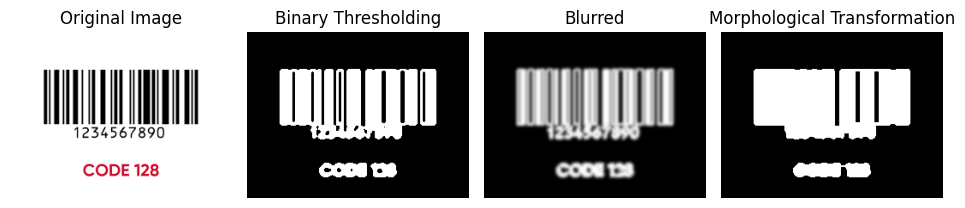

In [ ]:
import matplotlib.pyplot as plt
# Step 7: Visualize Results
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(1, 5, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Remove X and Y axes

# Binary Image
plt.subplot(1, 5, 2)
plt.title("Binary Thresholding")
plt.imshow(binary, cmap="gray")
plt.axis('off')  # Remove X and Y axes

# Blurred Image
plt.subplot(1, 5, 3)
plt.title("Blurred")
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Remove X and Y axes

# Morphological Transformation
plt.subplot(1, 5, 4)
plt.title("Morphological Transformation")
plt.imshow(cv2.cvtColor(closed, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Remove X and Y axes


plt.tight_layout()
plt.show()

Detected CODE128 barcode: 1234567890


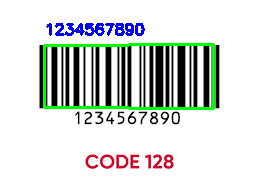

In [ ]:
import cv2
from pyzbar.pyzbar import decode
from google.colab.patches import cv2_imshow  # For displaying images in Colab

def detect_and_display_barcode(image_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Unable to load image.")
        return

    # Decode barcodes in the image
    decoded_barcodes = decode(image)

    if decoded_barcodes:
        for barcode in decoded_barcodes:
            # Extract barcode data (the value) and type
            barcode_data = barcode.data.decode("utf-8")
            barcode_type = barcode.type

            # Display the barcode data
            print(f"Detected {barcode_type} barcode: {barcode_data}")

            # Draw a rectangle around the barcode
            rect_points = barcode.polygon
            if len(rect_points) == 4:
                pts = np.array(rect_points, dtype=np.int32)
                pts = pts.reshape((-1, 1, 2))
                cv2.polylines(image, [pts], True, (0, 255, 0), 2)
            else:
                # If the shape is not a rectangle, we assume it's a polygon
                cv2.drawContours(image, [np.array(rect_points)], -1, (0, 255, 0), 2)

            # Put the decoded barcode data as text on the image
            x, y, w, h = barcode.rect
            cv2.putText(image, barcode_data, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Show the image with the barcode value displayed
        cv2_imshow(image)
    else:
        print("No barcodes detected in the image.")

# Example usage
image_path = "/content/drive/MyDrive/images/images3.png"  # Replace with your image path
detect_and_display_barcode(image_path)